In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import leastsq
import scipy.stats as spst
from scipy.stats import gaussian_kde
from matplotlib import cm
from pathos.threading import ThreadPool as Pool
from fitting_functions_2000 import *
import cartopy.crs as ccrs

In [2]:
fol='/home/vanoorschot/work/fransje/scripts/LAI_FCOVER/fittings/fitting_1km/final'
year_l = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]#,2014,2015,2016,2017,2018,2019]
vt_l = [1,2,3,4,5,6,9,13,16,17] #1
th_l = ['0.90','0.90','0.85','0.75','0.70','0.90','0.90','0.75','0.70','0.70'] #0.90
year_start = year_l[0]
year_end = year_l[-1]

In [3]:
# concatenate years
for i in range(len(vt_l)):
    all_x = np.array([])
    all_y = np.array([])
    all_lat = np.array([])
    all_lon = np.array([])
    for k in range(len(year_l)):
        x= np.load(f'{fol}/output/yearly_arrays_2000/x_{year_l[k]}_{vt_l[i]}_{th_l[i]}.npy')
        y= np.load(f'{fol}/output/yearly_arrays_2000/y_{year_l[k]}_{vt_l[i]}_{th_l[i]}.npy')
        lat= np.load(f'{fol}/output/yearly_arrays_2000/lat_{year_l[k]}_{vt_l[i]}_{th_l[i]}.npy')
        lon= np.load(f'{fol}/output/yearly_arrays_2000/lon_{year_l[k]}_{vt_l[i]}_{th_l[i]}.npy')
        
        all_x = np.concatenate([all_x,x])
        all_y = np.concatenate([all_y,y])
        all_lat = np.concatenate([all_lat,lat])
        all_lon = np.concatenate([all_lon,lon])
        
    np.save(f'{fol}/output/all_years_arrays_2000/x_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy',all_x)
    np.save(f'{fol}/output/all_years_arrays_2000/y_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy',all_y)
    np.save(f'{fol}/output/all_years_arrays_2000/lat_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy',all_lat)
    np.save(f'{fol}/output/all_years_arrays_2000/lon_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy',all_lon)

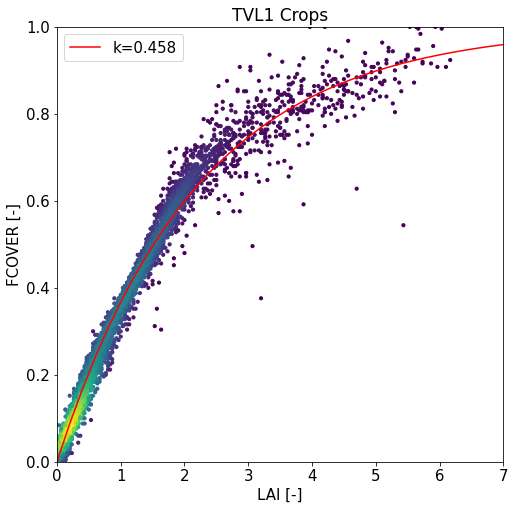

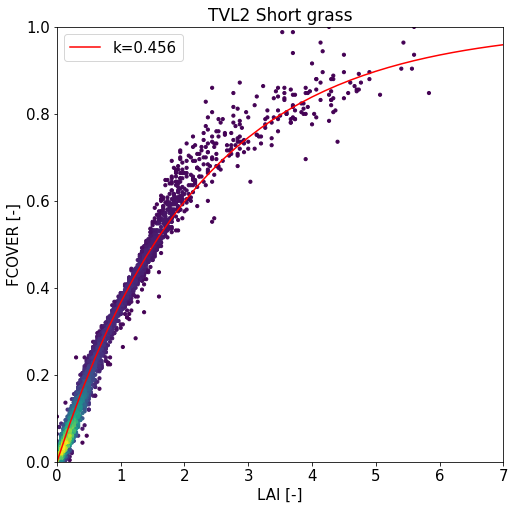

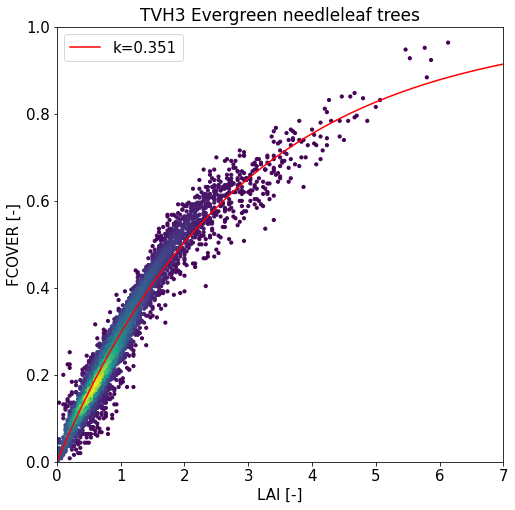

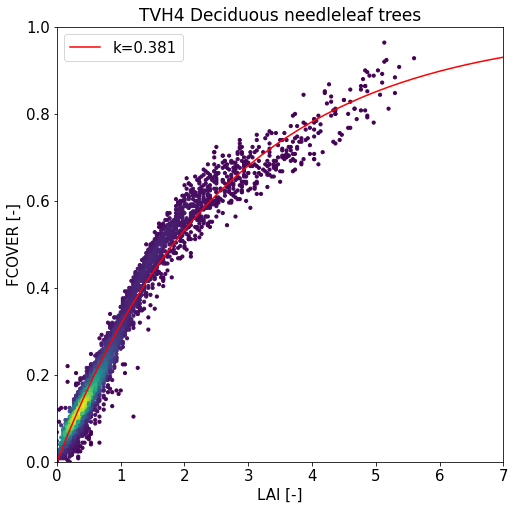

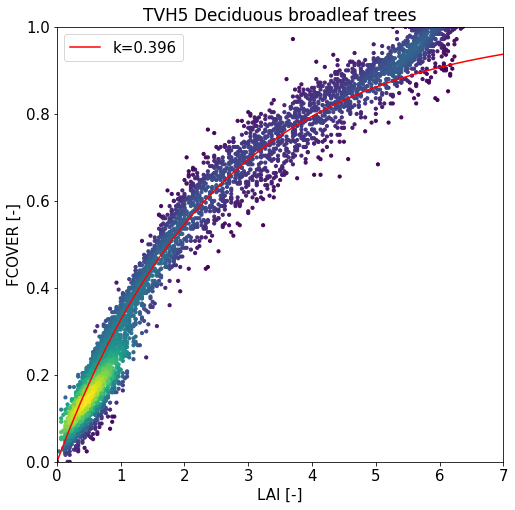

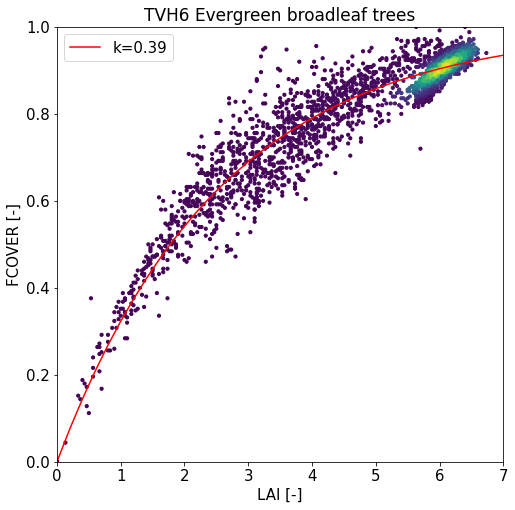

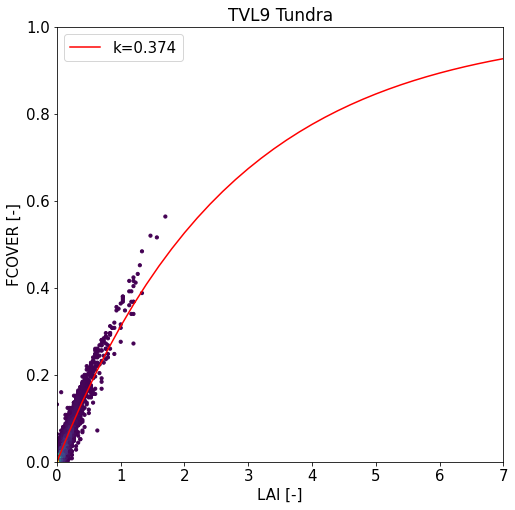

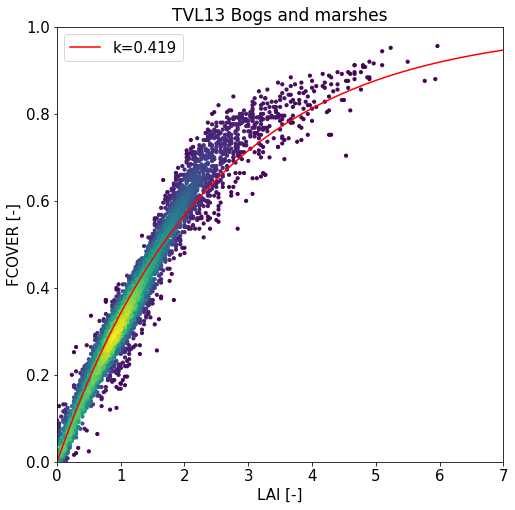

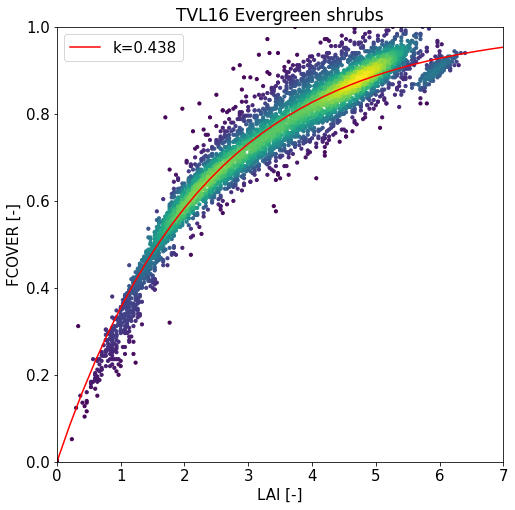

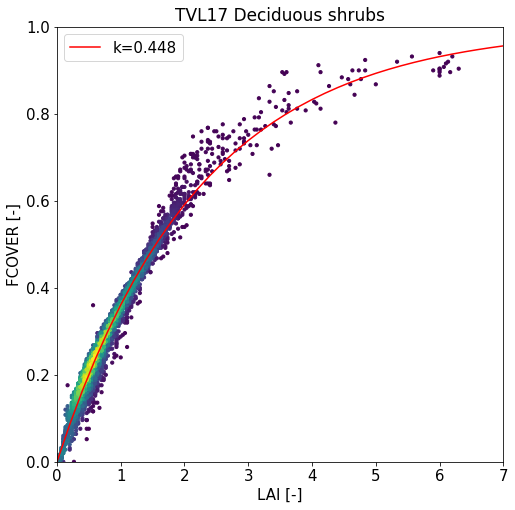

In [4]:
# RUN FITTING + PLOTS
for i in range(len(vt_l)):
    vt = vt_l[i]
    th = th_l[i]
    d = fitting_run(vt,th,year_start,year_end)
    
    x,y = d[0],d[1]
    x_fitted,y_fitted = d[2],d[3]
    pval,par = d[4],d[5]
    plotting(vt,th,x,y,x_fitted,y_fitted,pval,par,year_start,year_end)

                1        2        9        13       16       17       3   \
high/low       low      low      low      low      low      low     high   
#points    1505775  1502937  1409788  1501486  1510755  1508137  1501215   
threshold     0.90     0.90     0.90     0.75     0.70     0.70     0.85   
k            0.458    0.457    0.375    0.419    0.438    0.448    0.351   
p-val          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
rmse         0.036    0.026    0.018    0.049    0.045    0.026    0.038   

                4        5        6   
high/low      high     high     high  
#points    1510120  1508680  1509890  
threshold     0.75     0.70     0.90  
k            0.381    0.396     0.39  
p-val          0.0      0.0      0.0  
rmse         0.032    0.053    0.036  


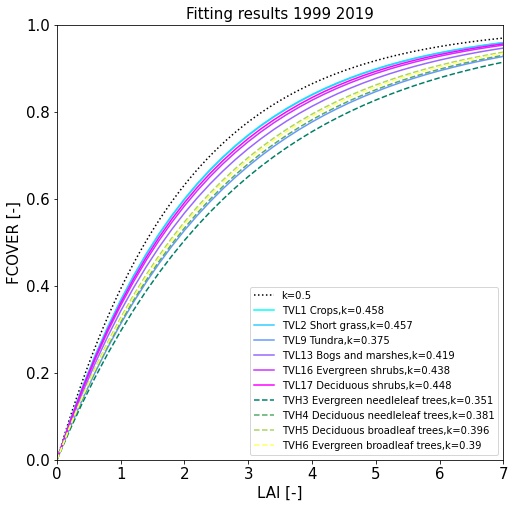

In [7]:
# run function to plot all fits in one figure
vt_l2 = [1,2,9,13,16,17,3,4,5,6] #change order to get high and low separated
th_l2 = ['0.90','0.90','0.90','0.75','0.70','0.70','0.85','0.75','0.70','0.90']

print(make_fitting_table(vt_l2, th_l2,year_start,year_end))
make_fitting_table(vt_l, th_l,year_start,year_end)
plot_all_fits(vt_l2, th_l2, year_start,year_end)

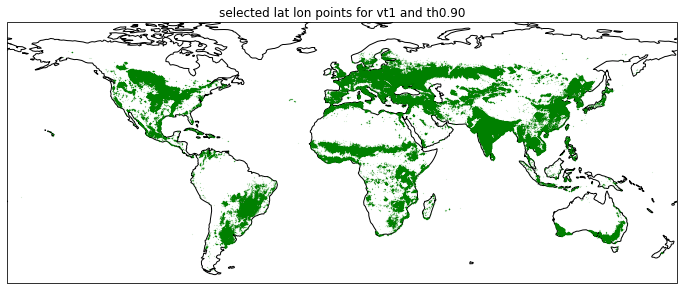

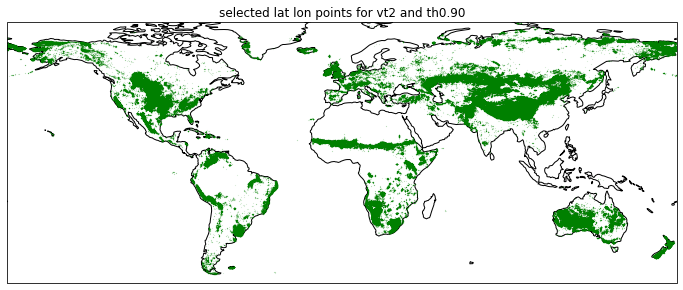

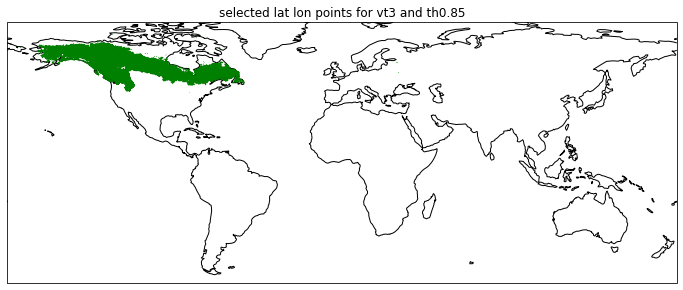

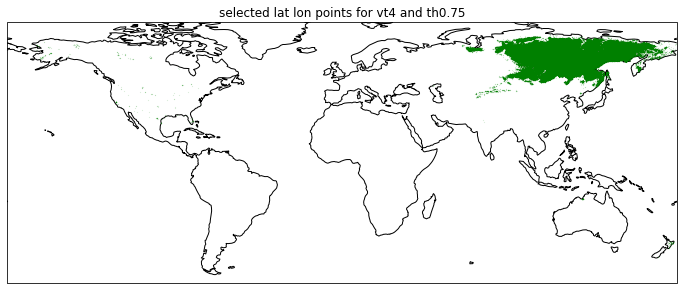

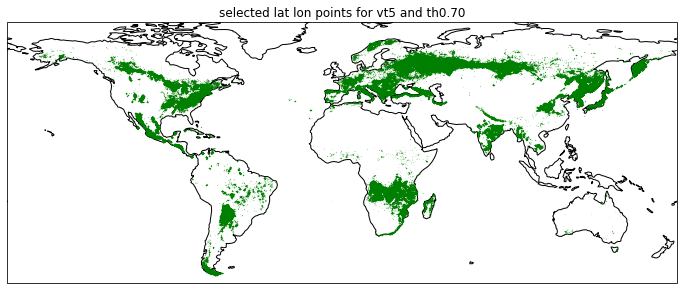

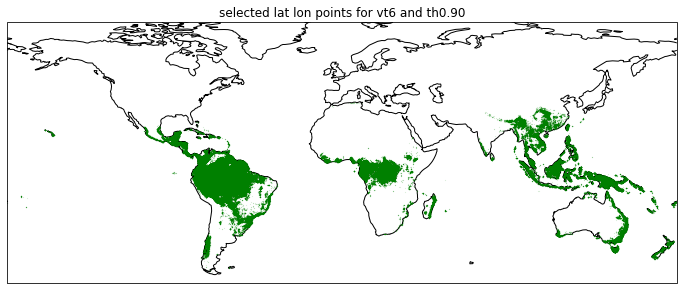

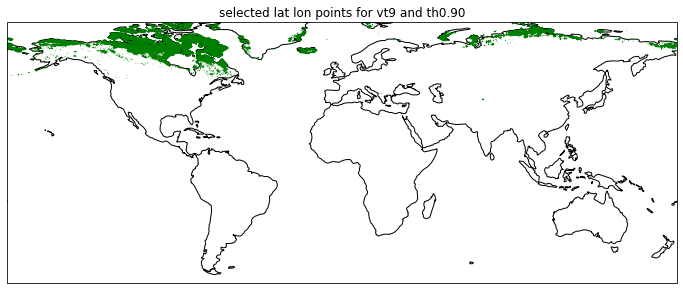

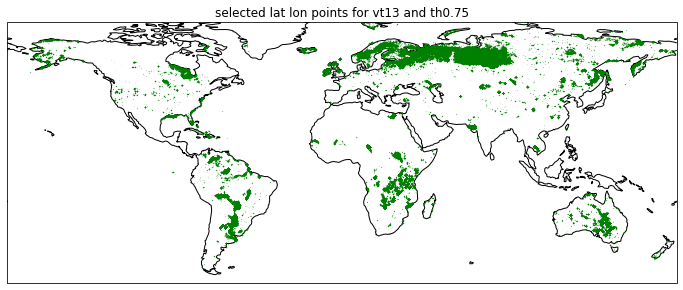

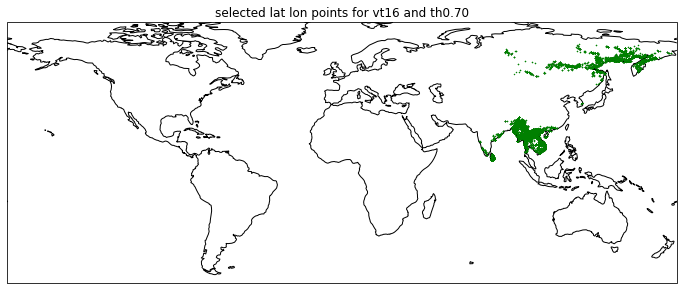

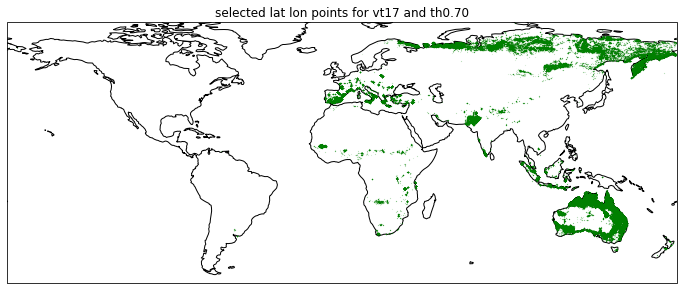

In [8]:
# visualize points
fol='/home/vanoorschot/work/fransje/scripts/LAI_FCOVER/fittings/fitting_1km/final'
year_l = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
vt_l = [1,2,3,4,5,6,9,13,16,17] #1
th_l = ['0.90','0.90','0.85','0.75','0.70','0.90','0.90','0.75','0.70','0.70'] #0.90
year_start = year_l[0]
year_end = year_l[-1]

for i in range(len(vt_l)):
    lat = np.load(f'{fol}/output/all_years_arrays/lat_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
    lon = np.load(f'{fol}/output/all_years_arrays/lon_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
    
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.plot(lon,lat,'o',color='green', markersize=0.05)
    ax.set_xlim(-180,180)
    ax.set_ylim(-60,80)
    ax.set_title(f'selected lat lon points for vt{vt_l[i]} and th{th_l[i]}')
    fig.savefig(f'{fol}/output/figures/map_selectedpoints_{vt_l[i]}_{th_l[i]}_{year_start}_{year_end}.jpg',bbox_inches='tight')